# Network #3.2


## Network Input:  

YEAR,
MONTH,
DAY,
HOUR,
MINUTE,
Latitude,
Longitude,
Distance to Graffiti,
Distance to a Drinking Fountain,
Google Trend

## Outputs:

Probability of crime occuring

#### Loading data and creating dataset to be used

##### Importing dataset, creating Date/Time key & adding crime

In [1]:
import pandas as pd
import numpy as np

# File loaded from Github Repo
file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/final_crime.csv'

df = pd.read_csv(file_path)

# Removing invalid points
df = df[pd.isnull(df['NEIGHBOURHOOD']) != pd.isnull(pd.NaT)]

df = df[['YEAR','MONTH','DAY','HOUR', 'MINUTE', 'Neighbourhood', 'Latitude', 'Longitude', 'Graffiti', 'Drinking_Fountain', 'Google_Trends']] 
print("Shape of Dataset imported for use: " + str(df.shape) + "\n")

print("Sample row")
df.head(1)

Shape of Dataset imported for use: (428141, 11)

Sample row


,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain,Google_Trends
0,2004,10,8,21.0,0.0,Fairview,49.265076,-123.118474,0.040765,0.402295,72


In [2]:
# Creating a Key which will be a Date/Time object

print ("------ Adding date-time object as key ------\n")
date_time_col = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR','MINUTE']])

# Make the added Date the index of the dataset
df['DateTimeMix'] = date_time_col
df.set_index('DateTimeMix', inplace=True)

print("Sample row")
df.head(1)

------ Adding date-time object as key ------

Sample row


,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain,Google_Trends
DateTimeMix,,,,,,,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,0.0,Fairview,49.265076,-123.118474,0.040765,0.402295,72


In [3]:
df['Crime'] = 1
print("Sample row")
df.head(1)

Sample row


,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain,Google_Trends,Crime
DateTimeMix,,,,,,,,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,0.0,Fairview,49.265076,-123.118474,0.040765,0.402295,72,1


##### Import Neighbourhoods and Function to generate co-ordinates in neighbourhood

In [4]:
# Import a list of all neighbourhoods and their center co-ordinates in Vancouver

nb_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/cov_localareas.csv'

neighbourhoods = pd.read_csv(nb_file_path)
print("List of Neighbourhoods : ")
neighbourhoods

List of Neighbourhoods : 


,MAPID,NAME,Latitude,Longitude
0,SUN,Sunset,49.218650,-123.091376
1,MP,Mount Pleasant,49.263060,-123.099888
2,RP,Riley Park,49.244679,-123.103239
3,CBD,Downtown,49.279255,-123.119137
4,KITS,Kitsilano,49.265663,-123.166947
5,DS,Dunbar-Southlands,49.242361,-123.185280
6,KERR,Kerrisdale,49.225466,-123.157878
7,AR,Arbutus-Ridge,49.245938,-123.160737
8,WPG,West Point Grey,49.265928,-123.202077
9,MARP,Marpole,49.210702,-123.130159


In [5]:
# Given a neighbourhood and a radius this code generates a random point in it and returns co-ordinates

import random
import math

def RandomLatLong(nieghbourhood, radius):
  
  r = radius/111300            
  
  row = neighbourhoods[neighbourhoods['NAME'] == nieghbourhood]

  x0 = float(row['Latitude'])
  y0 = float(row['Longitude'])
  
  u = float(random.uniform(0.0,1.0))
  v = float(random.uniform(0.0,1.0))

  w = r * math.sqrt(u)
  t = 2 * math.pi * v
  x = w * math.cos(t) 
  y = w * math.sin(t)

  xLat  = x + x0
  yLong = y + y0

  return (xLat, yLong)

RandomLatLong('Fairview', 500)

(49.26451555636907, -123.13193752947694)

##### Import Graffiti and Function to get distance from Graffiti

In [6]:
# Import a list of all graffiti locations

gr_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/Graffiti.csv'

graffiti = pd.read_csv(gr_file_path)
print("Number of graffiti instances: " + str(graffiti.shape))
print("Sample row")
graffiti.head(1)

Number of graffiti instances: (8507, 2)
Sample row


,Latitude,Longitude
0,49.22386,-123.090426


In [7]:
# Convert all coordinates to radians for easier calculations later
graffiti = graffiti.apply(np.radians)
print("Sample row")
print(graffiti.head(1))
graffiti = graffiti.values

Sample row
   Latitude  Longitude
0  0.859118  -2.148333


In [8]:
def DistanceToGraffiti(lat1, lon1):
    r = 6371 # Radius of earth in kilometers
    
    coordinates = np.array([np.radians(lat1), np.radians(lon1)])
    diff_array = graffiti - coordinates
    
    # Applying the haversine formula as array functions for speed
    a = np.square(np.sin(diff_array[:, 0]/2.0)) + np.cos(coordinates[0]) * np.cos(graffiti[:, 0]) * np.square(np.sin(diff_array[:, 1]/2.0))
    c = 2 * np.arcsin(np.sqrt(a)) 
    return np.amin(c)*r

DistanceToGraffiti(49.2650765,-123.1184743)

0.04076535081267878

##### Import Drinking fountain and Function to get distance from Drinking fountain

In [9]:
# Import a list of all drinking fountain locations

df_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/drinking_fountains.csv'

drinking = pd.read_csv(df_file_path)
drinking = drinking[['LATITUDE', 'LONGITUDE']]
print("Number of drinking fountains: " + str(drinking.shape))
print("Sample row")
drinking.head(1)

Number of drinking fountains: (240, 2)
Sample row


,LATITUDE,LONGITUDE
0,49.234947,-123.027254


In [10]:
# Convert all coordinates to radians for easier calculations later
drinking = drinking.apply(np.radians)
print("Sample row")
print(drinking.head(1))
drinking = drinking.values

Sample row
   LATITUDE  LONGITUDE
0  0.859312  -2.147231


In [11]:
def DistanceToFountain(lat1, lon1):
    r = 6371 # Radius of earth in kilometers
    
    coordinates = np.array([np.radians(lat1), np.radians(lon1)])
    diff_array = drinking - coordinates
    
    # Applying the haversine formula as array functions for speed
    a = np.square(np.sin(diff_array[:, 0]/2.0)) + np.cos(coordinates[0]) * np.cos(drinking[:, 0]) * np.square(np.sin(diff_array[:, 1]/2.0))
    c = 2 * np.arcsin(np.sqrt(a)) 
    return np.amin(c)*r

DistanceToFountain(49.2650765,-123.1184743)

0.40229507588315133

#### Upsample every 30 minute and add data points

In [0]:
import random

df_extra = df.groupby(level=0).count().resample('30min').asfreq()
df_extra = df_extra[pd.isna((df_extra['HOUR']))]

df_extra['Crime'] = 0
df_extra['YEAR'] = df_extra.index.year
df_extra['MONTH'] = df_extra.index.month
df_extra['DAY'] = df_extra.index.day
df_extra['HOUR'] = df_extra.index.hour
df_extra['MINUTE'] = df_extra.index.minute
df_extra['Neighbourhood'] = [neighbourhoods.sample()['NAME'].values[0] for i in range(0,df_extra.values.shape[0])]
df_extra[['Latitude', 'Longitude']] = df_extra['Neighbourhood'].apply(lambda x: RandomLatLong(x, 500)).apply(pd.Series)
df_extra['Graffiti'] = df_extra.apply(lambda x: DistanceToGraffiti(x['Latitude'], x['Longitude']), axis=1)
df_extra['Drinking_Fountain'] = df_extra.apply(lambda x: DistanceToFountain(x['Latitude'], x['Longitude']), axis=1)

In [13]:
df_extra.head(4)

,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain,Google_Trends,Crime
DateTimeMix,,,,,,,,,,,,
2004-01-01 00:30:00,2004,1,1,0,30,Oakridge,49.230512,-123.122391,0.243895,0.382588,NaN,0
2004-01-01 01:30:00,2004,1,1,1,30,South Cambie,49.247399,-123.123718,0.136539,0.512164,NaN,0
2004-01-01 02:00:00,2004,1,1,2,0,Arbutus-Ridge,49.248407,-123.164086,0.191961,0.319190,NaN,0
2004-01-01 02:30:00,2004,1,1,2,30,Downtown,49.278049,-123.121167,0.048236,0.224068,NaN,0


In [0]:
# Import google trends data

trendpath = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/googletrend.csv'

googletrend = pd.read_csv(trendpath, index_col='Month')
googletrend = np.array(googletrend)
trendvalue = []

In [0]:
for i, crime in df_extra.iterrows():
    #obtain the year and month of each crime
    y = crime['YEAR']
    m = crime['MONTH']
    #map it to the previous month in the other dataset 
    offset = (y - 2004)*12 + m - 1 - 1
    if offset == -1:
      offset = 0
    #store google trend value of the word 'crime' in an array
    trendvalue.append(googletrend[offset][0])

In [0]:
df_extra['Google_Trends'] = trendvalue

In [37]:
df_extra.head(4)

,YEAR,MONTH,DAY,HOUR,MINUTE,Neighbourhood,Latitude,Longitude,Graffiti,Drinking_Fountain,Google_Trends,Crime
DateTimeMix,,,,,,,,,,,,
2004-01-01 00:30:00,2004,1,1,0,30,Oakridge,49.230512,-123.122391,0.243895,0.382588,91,0
2004-01-01 01:30:00,2004,1,1,1,30,South Cambie,49.247399,-123.123718,0.136539,0.512164,91,0
2004-01-01 02:00:00,2004,1,1,2,0,Arbutus-Ridge,49.248407,-123.164086,0.191961,0.319190,91,0
2004-01-01 02:30:00,2004,1,1,2,30,Downtown,49.278049,-123.121167,0.048236,0.224068,91,0


In [38]:
print("Shape of Original Dataset: " + str(df.shape) + "\n")

df = df.append(df_extra)

print("Shape of Upsampled Dataset with No crime values: " + str(df.shape) + "\n")

Shape of Original Dataset: (542276, 12)

Shape of Upsampled Dataset with No crime values: (656411, 12)



#### Extract network input and output and make sets

In [0]:
Y = df['Crime'].values
X = df[['YEAR','MONTH','DAY','HOUR', 'MINUTE', 'Latitude', 'Longitude', 'Graffiti', 'Drinking_Fountain', 'Google_Trends']].values

In [40]:
X[0]

array([ 2.00400000e+03,  1.00000000e+01,  8.00000000e+00,  2.10000000e+01,
        0.00000000e+00,  4.92650765e+01, -1.23118474e+02,  4.07653508e-02,
        4.02295076e-01,  7.20000000e+01])

In [41]:
Y[0]

1

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)
print(X[0])

[0.         0.81818182 0.23333333 0.91304348 0.         0.57072995
 0.52565412 0.01773226 0.17948401 0.46153846]


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print("Training Data Size: " + str(X_train.shape))
print("Testing Data Size:" + str(X_test.shape))
print("Training Label Size: " + str(Y_train.shape))
print("Testing Label Size: " + str(Y_test.shape))

Training Data Size: (439795, 10)
Testing Data Size:(216616, 10)
Training Label Size: (439795,)
Testing Label Size: (216616,)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot loss and accuracy vs epochs
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def accuracy(history):
  acc  = history.history['acc']
  val_acc = history.history['val_acc']
  x_axis     = range(1, len(history.history['acc'])+1)
  
  plt.figure()
  plt.plot(x_axis, np.dot(acc,100), label="Accuracy")
  plt.plot(x_axis, np.dot(val_acc, 100), label="Validation Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Accuracy')
  plt.legend()

#### Training Network

In [45]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1], ) ) )
model.add(Dense(128, activation='sigmoid') )
model.add(Dense(512, activation='sigmoid') )
model.add(Dense(128, activation='sigmoid') )
model.add(Dense(64, activation='sigmoid') )


model.add(Dense(1, activation='sigmoid') )

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 149,057
Trainable params: 149,057
Non-trainable params: 

In [46]:
history = model.fit(X_train, Y_train,
          epochs = 50,
          batch_size=128,
          validation_split=0.1,
          verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 395815 samples, validate on 43980 samples
Epoch 1/50
395815/395815 [==============================] - 12s 30us/step - loss: 0.5651 - acc: 0.7047 - val_loss: 0.5665 - val_acc: 0.7128
Epoch 2/50
395815/395815 [==============================] - 12s 31us/step - loss: 0.5477 - acc: 0.7170 - val_loss: 0.5480 - val_acc: 0.7151
Epoch 3/50
395815/395815 [==============================] - 11s 28us/step - loss: 0.5465 - acc: 0.7178 - val_loss: 0.5500 - val_acc: 0.7160
Epoch 4/50
395815/395815 [==============================] - 11s 27us/step - loss: 0.5449 - acc: 0.7180 - val_loss: 0.5448 - val_acc: 0.7196
Epoch 5/50
395815/395815 [==============================] - 11s 27us/step - loss: 0.5319 - acc: 0.7251 - val_loss: 0.4624 - val_acc: 0.7704
Epoch 6/50
395815/395815 [==============================] - 12s 31us/step - loss: 0.4076 - acc: 0.7954 - val_loss: 0.3951 - val_acc: 0.8044
Epoch 7/50
395815/395815 [==============================] - 1

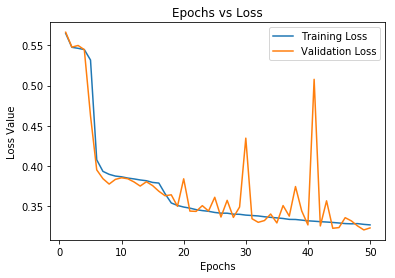

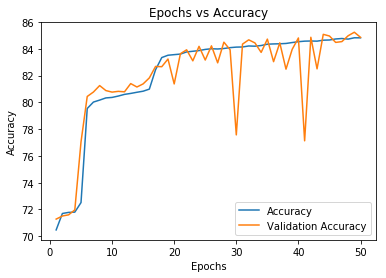

In [47]:
loss_curve(history)
accuracy(history)

In [48]:
print("Evaluating on Test Dataset")
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Evaluating on Test Dataset
acc: 84.69%


In [49]:
# Predicting for random year/month/day/hour

test = np.array([[2019, 2, 11, 1,25, 49.237994, -123.083282, DistanceToGraffiti(49.237994, -123.083282), DistanceToFountain(49.237994, -123.083282)]])
test = scaler.transform(test)
ans = model.predict(test)
ans

ValueError: ignored

In [51]:
# Predicting for another random year/month/day/hour

test = np.array([[2012, 6, 4, 22, 2, 49.238019, -123.163815, DistanceToGraffiti(49.238019, -123.163815), DistanceToFountain(49.238019, -123.163815), 57]])
test = scaler.transform(test)
ans = model.predict(test)
ans

array([[0.86183715]], dtype=float32)

In [52]:
# Predict crime in a location over the whole day
for i in range(0, 25):
  test = np.array([[2012, 6, 4, i, 2, 49.284645, -123.136306, DistanceToGraffiti(49.284645, -123.136306), DistanceToFountain(49.284645, -123.136306), 57]])
  test = scaler.transform(test)
  ans = model.predict(test)
  print("Likelihood of crime at " + str(i) + " hour: " + str(ans[0][0]*100) + " %") 

Likelihood of crime at 0 hour: 99.98704195022583 %
Likelihood of crime at 1 hour: 92.92207360267639 %
Likelihood of crime at 2 hour: 71.87596559524536 %
Likelihood of crime at 3 hour: 68.68614554405212 %
Likelihood of crime at 4 hour: 70.78368067741394 %
Likelihood of crime at 5 hour: 70.80574035644531 %
Likelihood of crime at 6 hour: 77.6524305343628 %
Likelihood of crime at 7 hour: 84.38645601272583 %
Likelihood of crime at 8 hour: 87.18870878219604 %
Likelihood of crime at 9 hour: 88.60319256782532 %
Likelihood of crime at 10 hour: 89.77153897285461 %
Likelihood of crime at 11 hour: 91.44240617752075 %
Likelihood of crime at 12 hour: 94.02211308479309 %
Likelihood of crime at 13 hour: 95.71576118469238 %
Likelihood of crime at 14 hour: 96.39127850532532 %
Likelihood of crime at 15 hour: 97.63058423995972 %
Likelihood of crime at 16 hour: 98.65514039993286 %
Likelihood of crime at 17 hour: 98.90921115875244 %
Likelihood of crime at 18 hour: 98.98730516433716 %
Likelihood of crime at 

In [53]:
# Predict crime in a location over the whole day
for i in range(0, 25):
  test = np.array([[2012, 6, 4, i, 2, 49.289599, -123.136649, DistanceToGraffiti(49.289599, -123.136649), DistanceToFountain(49.289599, -123.136649), 57]])
  test = scaler.transform(test)
  ans = model.predict(test)
  print("Likelihood of crime at " + str(i) + " hour: " + str(ans[0][0]*100) + " %") 

Likelihood of crime at 0 hour: 99.9911904335022 %
Likelihood of crime at 1 hour: 94.08118724822998 %
Likelihood of crime at 2 hour: 75.89337825775146 %
Likelihood of crime at 3 hour: 70.90758085250854 %
Likelihood of crime at 4 hour: 74.65764284133911 %
Likelihood of crime at 5 hour: 76.6549289226532 %
Likelihood of crime at 6 hour: 82.58070945739746 %
Likelihood of crime at 7 hour: 87.0311439037323 %
Likelihood of crime at 8 hour: 88.95747661590576 %
Likelihood of crime at 9 hour: 90.30100107192993 %
Likelihood of crime at 10 hour: 91.96285605430603 %
Likelihood of crime at 11 hour: 93.98326873779297 %
Likelihood of crime at 12 hour: 95.61585187911987 %
Likelihood of crime at 13 hour: 96.34467959403992 %
Likelihood of crime at 14 hour: 97.11378216743469 %
Likelihood of crime at 15 hour: 98.59527349472046 %
Likelihood of crime at 16 hour: 99.0047037601471 %
Likelihood of crime at 17 hour: 99.06836748123169 %
Likelihood of crime at 18 hour: 99.10007119178772 %
Likelihood of crime at 19 